In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Importando os dados da Embraer (EMBR3.SA) do Yahoo Finance desde o início dos registros de ações no ano 2000

In [2]:
start_date = '1980-01-01'    # format: aaaa/mm/dd/
end_date = '2017-03-23'                # format: aaaa/mm/dd/
EMBR3 = wb.DataReader('EMBR3.SA', data_source='yahoo', start=start_date)
EMBR3.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-08,13.10,12.14,12.59,12.23,15305200.0,12.23
2021-03-09,12.53,12.00,12.21,12.34,12879700.0,12.34
2021-03-10,13.82,12.24,12.38,13.82,22790700.0,13.82
2021-03-11,13.93,13.40,13.84,13.74,17259300.0,13.74
2021-03-12,14.52,13.67,13.69,14.40,20211700.0,14.40


# Calculando retorno de uma ação

$\mathbf{\text{Simples}}$

Quando se diz que uma ação custava R\\$100 e subiu 10\% e pensamos no valor final como R\\$110, então estamos pensando no retorno simples.<br><br>
$$\text{Taxa simples} = \frac{Preço_{final}-Preço_{inicial}}{Preço_{inicial}} = \frac{Preço_{final}}{Preço_{inicial}} - 1$$


Assim a fórmula geral para se obter o retorno ao final de um período seria:<br>
$$\text{Taxa simples acumulada = } \left(\prod_{k=1}^{N} (1+R_k)\right) - 1$$

In [3]:
EMBR3['Retorno simples'] = (EMBR3['Adj Close']/EMBR3['Adj Close'].shift(1)) - 1
# .shift(n) é função do pandas para uso em dataframes
# a primeira célula tem valor NaN por não ter registro de um dia anterior ao primeiro dia do DataFrame

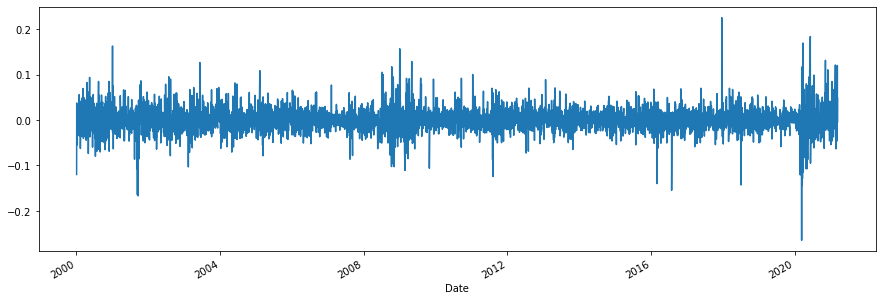

In [4]:
EMBR3['Retorno simples'].plot(figsize=(15,5))
plt.show()

In [5]:
retornoMedioSimplesDia = EMBR3['Retorno simples'].mean()
retornoMedioSimplesDia

0.000499867024304685

Para se ter uma noção melhor de rendimento anual, esse valor de rendimento diário será multiplicado por 250 (considerando que em média um ano tem ~250 dias úteis).

In [6]:
retornoMedioSimplesAno = EMBR3['Retorno simples'].mean()*250
print(str(round(retornoMedioSimplesAno, 4)*100)+' %')

12.5 %


$\mathbf{\text{Logarítmica}}$
$$\text{Taxa logarítmica} = \ln{ \left(\frac{Preço_{final}}{Preço_{inicial}}\right)}$$

Assim a fórmula geral para se obter o retorno ao final de um período seria:<br>
$$\text{Taxa logarítmica acumulada = } \sum_{k=1}^{N} r_k$$
Ou seja, podemos apenas somar os logaritmos dos retornos para ter a taxa logarítmica final, bem diferente do que ocorre com o produtório do acumulado em termos de taxa simples.<br><br>
Mesmo que os cálculos sejam realizados usando a taxa log, o mais usual é se apresentar o resultado em termos de taxa simples!<br><br>
__É preferível usar o retorno simples quando comparando várias ações diferentes e retorno logarítmico quando comparando a mesma ação ao longo do tempo__.

In [7]:
EMBR3['Retorno logarítmico'] = np.log(EMBR3['Adj Close']/EMBR3['Adj Close'].shift(1))

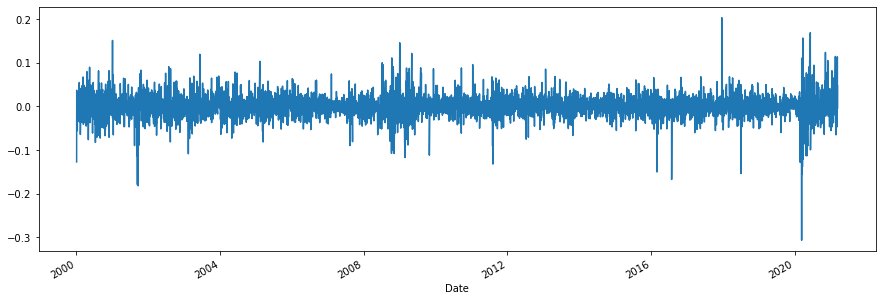

In [8]:
EMBR3['Retorno logarítmico'].plot(figsize=(15,5))
plt.show()

In [9]:
retornoMedioLogDia = EMBR3['Retorno logarítmico'].mean()
retornoMedioLogDia

0.0001624693711026207

In [10]:
retornoMedioLogAno = EMBR3['Retorno logarítmico'].mean()*250
print(str(round(retornoMedioLogAno, 4)*100)+' %')

4.06 %
